In [20]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [13]:
graph_perception = False

if graph_perception:
    cumulative_stats_folder_path = './evaluation_outputs/cumulative_stats_with_perception'
    chart_title = "with Perception"
else:
    cumulative_stats_folder_path = './evaluation_outputs/cumulative_stats_no_perception'
    chart_title = "without Perception"

In [30]:
import os
import pickle
import seaborn as sns


def save_ax(ax=None, file_path=""):
    """
    Save the plot to a file.

    Args:
    ax (Axes): The axis object containing the plot.
    file_path (str): The path where the plot should be saved.
    """
    if not file_path or not ax:
        print("File path or axis object not provided.")
        return

    ax.figure.savefig(file_path)
    print(f"Saved file: {file_path}")


def get_stats_df(file_path=""):
    """
    Load a DataFrame from a pickle file.

    Args:
    file_path (str): The path of the pickle file.

    Returns:
    pd.DataFrame: The DataFrame loaded from the pickle file.
    """
    if not os.path.exists(file_path):
        print(f"Cannot find file {file_path}")
        return None

    try:
        with open(file_path, 'rb') as picklefile:
            stats_df = pickle.load(picklefile)
        return stats_df
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")


def create_box_plot(data, x, y, labels):
    """
    Create a box plot using seaborn.

    Args:
    data (pd.DataFrame): The DataFrame containing the data to be plotted.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    labels (dict): A dictionary containing the labels for the plot (xlabel, ylabel, title).

    Returns:
    Axes: The axis object containing the box plot.
    """
    ax = sns.boxplot(data=data, x=x, y=y)
    ax.set(xlabel=labels['xlabel'],
           ylabel=labels['ylabel'],
           title=labels['title'])
    return ax


def create_scatter_plot(data, x, y, labels):
    """
    Create a scatter plot using seaborn.

    Args:
    data (pd.DataFrame): The DataFrame containing the data to be plotted.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    labels (dict): A dictionary containing the labels for the plot (xlabel, ylabel, title).

    Returns:
    Axes: The axis object containing the scatter plot.
    """
    ax = sns.scatterplot(data=data, x=x, y=y)
    ax.set(xlabel=labels['xlabel'],
           ylabel=labels['ylabel'],
           title=labels['title'])
    return ax

In [27]:
# DataFrame Paths
sim_time_df_path = f'./{cumulative_stats_folder_path}/df_total_sim_time'
sim_time_df_cumstats_path = f'./{cumulative_stats_folder_path}/df_total_sim_time_cumstats'

# Plotting simulation total run time stats
sim_stats_df = get_stats_df(sim_time_df_path)
sim_cumstats_df = get_stats_df(sim_time_df_cumstats_path)

print(sim_stats_df, '\n')
print(sim_cumstats_df, '\n')

labels = {"xlabel": 'Number of Cars', 
'ylabel':'Total Runtime (s)',
'title': f'Total Runtime per Number of Cars ({chart_title})'}

  num_cars      time_s        run_timestamp
0        4   63.051738  2023-03-10 03:18:45
1        4   87.436837  2023-03-10 03:21:21
2        8   78.908627  2023-03-10 03:24:26
3        8   74.182414  2023-03-10 03:29:08
4       16  119.069339  2023-03-10 03:32:00
5       16  241.972453  2023-03-10 03:36:45
6       16  141.505448  2023-04-21 18:13:34 

   num_cars        std        mean      median         min         max
0         4  17.242869   75.244287   75.244287   63.051738   87.436837
1         8   3.341937   76.545520   76.545520   74.182414   78.908627
2        16  65.449947  167.515747  141.505448  119.069339  241.972453 



Saved file: ././evaluation_outputs/cumulative_stats_no_perception/total_sim_time_boxplot.png


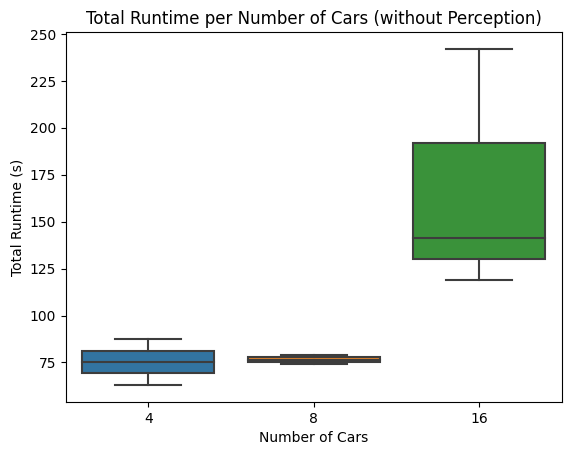

<Figure size 640x480 with 0 Axes>

In [31]:
ax = create_box_plot(data=sim_stats_df, x = 'num_cars', y = 'time_s',labels=labels)
save_file_path = f'./{cumulative_stats_folder_path}/total_sim_time_boxplot.png'
save_ax(ax, save_file_path)
plt.show()
plt.clf()

In [ ]:
ax = create_scatter_plot(data=sim_stats_df, x = 'num_cars', y = 'time_s',labels=labels)
save_file_path = f'./{cumulative_stats_folder_path}/total_sim_time_scatterplot.png'
save_ax(ax, save_file_path)
plt.show()
plt.clf()

In [33]:
# Plotting simulation step time stats
step_time_df_path = f'./{cumulative_stats_folder_path}/df_step_time'
step_time_df_cumstats_path = f'./{cumulative_stats_folder_path}/df_step_time_cumstats'

sim_stats_df = get_stats_df(step_time_df_path)
sim_cumstats_df = get_stats_df(step_time_df_cumstats_path)

print(sim_stats_df, '\n')
print(sim_cumstats_df, '\n')

labels = {"xlabel": 'Number of Cars', 
'ylabel':'Simulation Step Time (ms)',
'title': f'Simulation Step Time per Number of Cars ({chart_title})'}

     num_cars  step_time_ms        run_timestamp
0           4     22.483826  2023-03-10 03:18:45
1           4     20.382166  2023-03-10 03:18:45
2           4     24.068356  2023-03-10 03:18:45
3           4     24.688005  2023-03-10 03:18:45
4           4     25.823355  2023-03-10 03:18:45
...       ...           ...                  ...
2616       16     93.348742  2023-04-21 18:13:34
2617       16     90.483189  2023-04-21 18:13:34
2618       16     86.823225  2023-04-21 18:13:34
2619       16     88.400841  2023-04-21 18:13:34
2620       16     96.856117  2023-04-21 18:13:34

[2621 rows x 3 columns] 

   num_cars       std       mean     median        min         max
0         4  2.766880  24.389260  24.061918  18.756390   37.849903
1         8  4.708560  44.864507  44.019580  35.867453   75.107098
2        16  5.960587  89.974036  89.528799  75.844049  119.724989 



Saved file: ././evaluation_outputs/cumulative_stats_no_perception/step_time_boxplot.png


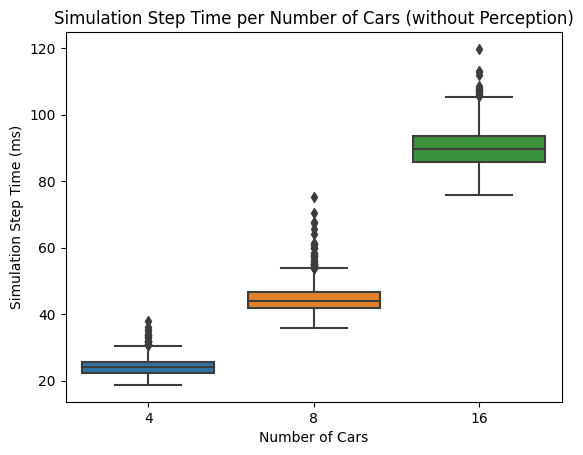

<Figure size 640x480 with 0 Axes>

In [36]:
ax = create_box_plot(data=sim_stats_df, x = 'num_cars', y = 'step_time_ms',labels=labels)
save_file_path = f'./{cumulative_stats_folder_path}/step_time_boxplot.png'
save_ax(ax, save_file_path)
plt.show()
plt.clf()

Saved file: ././evaluation_outputs/cumulative_stats_no_perception/step_time_scatterplot.png


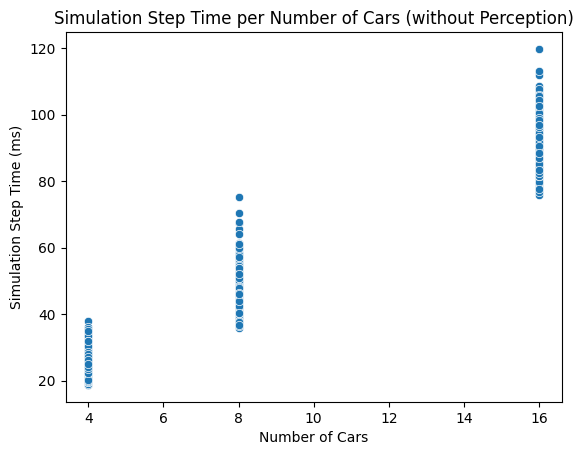

<Figure size 640x480 with 0 Axes>

In [35]:
ax = create_scatter_plot(data=sim_stats_df, x = 'num_cars', y = 'step_time_ms',labels=labels)
save_file_path = f'./{cumulative_stats_folder_path}/step_time_scatterplot.png'
save_ax(ax, save_file_path)
plt.show()
plt.clf()